In [45]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)
import matplotlib.pyplot as plt


In [46]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))
def LOR_GD(X,Y):
    m = X.shape[0]  
    lr = 0.5
    X = np.insert(X,0,1,axis=1)
    W = np.ones(X.shape[1])

    for i in range(2500):
        Y_hat = sigmoid(np.dot(X,W))
        W = W + lr * 1/m * np.dot(Y - Y_hat,X)

    return W[1:],W[0]

coef_,intercept_ = LOR_GD(X,y)

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(-3.0, 2.0)

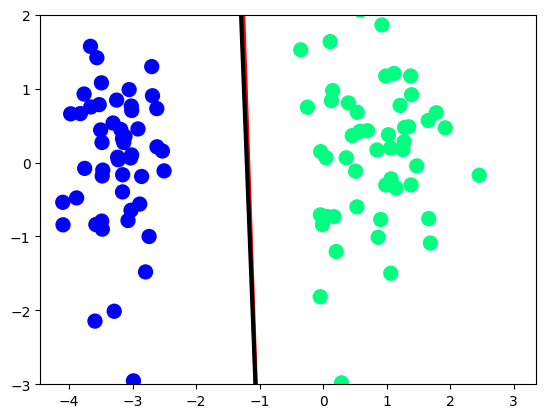

In [47]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None,solver='sag')
lor.fit(X,y)
m3 = -(lor.coef_[0][0]/lor.coef_[0][1])
b3 = -(lor.intercept_/lor.coef_[0][1])

x_val = np.linspace(-3,3,100)
y_val = m*x_val + b
y_val1 = m3*x_val + b3
plt.plot(x_val,y_val,color='red',linewidth=3)
plt.plot(x_val,y_val1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)